<a href="https://colab.research.google.com/github/JiseonByeon96/PersonalProject/blob/main/%EC%83%9D%ED%99%9C%ED%8F%90%EA%B8%B0%EB%AC%BC%EC%A2%85%EB%A5%98_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import re
import json
from tqdm.notebook import tqdm
news_link = []


In [2]:
from tqdm.notebook import tqdm 

# page = 1, 2, 3, ~~~ 10
no_page = 10

news_link = []
for page in tqdm(range(1, no_page+1)): 
  url = 'https://search.naver.com/search.naver'

  query = {
      'where' : 'news',
      'query' : '생활쓰레기',
      'start' : page   
  } 

  resp = requests.get(url, query)

  soup = BeautifulSoup(resp.content, 'lxml')
  #ul.type01 li dl dt a
  a_tag = soup.select("a[class=info]")  # a.info 로 지정 시 info가 포함된 모든 a tag; 즉 info press 와 info가 모두 파싱되므로 명확하게 이름 지정 

  for a in a_tag: # 10바퀴 * 10바퀴 = 100바퀴
    news_link.append(a['href'])


In [3]:
news_link

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=001&aid=0012185905',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=277&aid=0004842459',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=003&aid=0010330032',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=003&aid=0010330026',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010983031',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010984306',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=277&aid=0004842459',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=003&aid=0010330032',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=003&aid=0010330026',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=001&aid=0012180260',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010984306',
 'https://

In [4]:
headers = {
    'Referer': 'https://hk-match.taboola.com/',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'
    } # 각자 본인의 User-Agent 정보 입력 

news = []
for link in tqdm(news_link):
    resp = requests.get(link, headers = headers)

    soup = BeautifulSoup(resp.content, 'lxml')

    try: # 속보
        press = soup.select('div.press_logo img')[0]['title'] # 언론사 
        title = soup.select('div.article_info h3')[0].text # 타이틀

        publish_date = soup.select('div.sponsor span.t11')[0].text # 기사 입력 날짜 
        try: 
            modify_date = soup.select('div.sponsor span.t11')[1].text #최종 수정날짜 (만약 존재한다면)
        except:
            modify_date = ''  
        content = soup.select('div#articleBodyContents')[0].text.replace('// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}','').strip() # 앞 뒤의 공백 및 필요없는 문구 제거 
    except: # TV 연예홈 or 스포츠
        pass
        # if: # TV 연예홈

        # else: # 스포츠

    news.append([press, title, publish_date, modify_date, content ])

In [7]:
df_news = pd.DataFrame(news, columns=['언론사', '기사제목', '기사입력날짜', '최종수정날짜', '원문'])
df_news

,언론사,기사제목,기사입력날짜,최종수정날짜,원문
0,연합뉴스,"서울시, 11∼13일 하루 2개區만 생활쓰레기 배출 가능",2021.02.05. 오전 6:00,,서울시청[연합뉴스 자료사진] (서울=연합뉴스) 김지헌 기자 = 서울시는 설 연...
1,아시아경제,"경기도, 설 연휴 '생활쓰레기 관리대책' 마련",2021.02.05. 오전 7:20,,"[아시아경제(수원)=이영규 기자] 경기도가 설 연휴 '생활쓰레기 관리대책'을 마련,..."
2,뉴시스,2026년부터 수도권 생활쓰레기 직매립 금지…2030년 전국 확대,2021.02.04. 오후 12:00,,"환경부, '폐기물관리법' 시행령·규칙 개정안 입법예고생활쓰레기 직매립 13%…매립지..."
3,뉴시스,설 연휴 생활쓰레기 단속…불법배출땐 과태료 최대 100만원,2021.02.04. 오후 12:00,,"환경부, 8~17일 '설 연휴 생활폐기물 특별관리'연휴 전후 폐기물 수거관리…긴급대..."
4,KBS,"설 연휴 일부 기간, 생활쓰레기 미수거",2021.02.03. 오전 10:09,,[KBS 강릉]설 연휴를 맞아 강원도 내 시군들이 설 연휴 일부 기간에 생활쓰레기를...
5,KBS,"충북 1인당 쓰레기 배출, 전국 최상위…실태와 원인은?",2021.02.04. 오후 9:56,,[KBS 청주] [앵커] 충북 각 시·군이 나날이 늘어가는 폐기물 처리에 골머리를 ...
6,아시아경제,"경기도, 설 연휴 '생활쓰레기 관리대책' 마련",2021.02.05. 오전 7:20,,"[아시아경제(수원)=이영규 기자] 경기도가 설 연휴 '생활쓰레기 관리대책'을 마련,..."
7,뉴시스,2026년부터 수도권 생활쓰레기 직매립 금지…2030년 전국 확대,2021.02.04. 오후 12:00,,"환경부, '폐기물관리법' 시행령·규칙 개정안 입법예고생활쓰레기 직매립 13%…매립지..."
8,뉴시스,설 연휴 생활쓰레기 단속…불법배출땐 과태료 최대 100만원,2021.02.04. 오후 12:00,,"환경부, 8~17일 '설 연휴 생활폐기물 특별관리'연휴 전후 폐기물 수거관리…긴급대..."
9,연합뉴스,부산시 설 연휴 생활쓰레기 무단투기 집중 단속,2021.02.03. 오전 8:16,,추석 연휴 기간 쌓인 쓰레기[연합뉴스 자료사진] (부산=연합뉴스) 김선호 기자...


In [14]:
df_news.to_excel('df_news.xlsx')

In [8]:
doc = df_news.iloc[0]['원문']

In [9]:
from gensim.summarization import keywords
keywords(doc, words=10).split('\n')

['연합뉴스', '복지급여', '처리할 것이라고', '생활쓰레기 배출일을 지정해', '가능하다']

In [10]:
from gensim.summarization.summarizer import summarize


In [11]:
summarize(doc, ratio = 0.5)

'서울시청[연합뉴스 자료사진]    (서울=연합뉴스) 김지헌 기자 = 서울시는 설 연휴 중 자치구별로 생활쓰레기 배출일을 지정해 운영한다고 5일 밝혔다.\n마지막 날인 14일은 시 전역에서 배출할 수 있다.\njk@yna.co.kr▶네이버에서도 뉴스는 연합뉴스[구독 클릭]▶[팩트체크]조두순 복지급여 중단이나 감액 가능?▶제보하기<저작권자(c) 연합뉴스(https://www.yna.co.kr/), 무단 전재-재배포 금지>'

In [12]:
summarize(doc, word_count = 50)

'서울시청[연합뉴스 자료사진]    (서울=연합뉴스) 김지헌 기자 = 서울시는 설 연휴 중 자치구별로 생활쓰레기 배출일을 지정해 운영한다고 5일 밝혔다.\n연휴 첫날인 11일은 성동·강남, 12일은 종로·강동, 13일은 영등포·송파구만 쓰레기 배출이 가능하다.\n연휴 전인 오는 8∼10일은 평소대로 배출하면 된다.\n시는 연휴 중 자치구 환경미화원 1만1천257명이 특별 근무해 주요 지역 거리를 청소하고 청소 민원을 처리할 것이라고 전했다.'

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,727 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146456 files and d

In [15]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 49.2MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


'환경부는 설 연휴를 앞두고 오는 8일부터 열흘 동안 생활폐기물 특별관리 대책을 추진한다고 밝혔습니다. 특별대책에 따르면 상습 불법 투기 지역과 주요 도로구간 등에서 쓰레기 무단투기 행위를 단속하고, 공동주택 재활용폐기물의 수거 지연 방지를 위해 적치 여유 공간을 미리 확보할 계획입니다. 또, 연휴 이후 선별장 적체로 인한 수거 지연을 막기 위해 임시적환장 211곳을 마련하고, 임시적환장이 포화될 경우 인근 폐기물 파쇄·처리업체로 즉시 이송하도록 했습니다.이덕영 기자(deok@mbc.co.kr)[저작권자(c) MBC (https://imnews.imbc.com) 무단복제-재배포 금지]▶ 네이버 홈에서 [MBC뉴스] 채널 구독하기▶ 새로움을 탐험하다. "엠빅뉴스"▶ [M라운지] 편안한데 찰진 수다의 공간Copyright(c) Since 1996, MBC&iMBC All rights reserved.'

In [16]:
def text_cleaning(doc):
  text = re.sub('[^가-힣0-9a-zA-Z%,\.]', ' ', string = doc) 
  return text

In [17]:
clean_doc = text_cleaning(doc)


In [ ]:
df_news

,언론사,기사제목,기사입력날짜,최종수정날짜,원문
0,MBC,"환경부, 설 연휴 생활폐기물 특별대책 마련",2021.02.04. 오후 2:17,2021.02.04. 오후 2:30,환경부는 설 연휴를 앞두고 오는 8일부터 열흘 동안 생활폐기물 특별관리 대책을 추진...
1,연합뉴스,생활폐기물 직접 매립 금지된다…수도권은 2026년부터 시행,2021.02.04. 오후 12:00,,수도권 외 지역은 2030년부터…지자체별 폐기물 처리시설 확충 추진고성군 생활폐기물...
2,KBS,"수도권매립지, 설 연휴에 ‘13일 하루만 폐기물 반입’ 허용",2021.02.04. 오후 2:45,2021.02.04. 오후 2:51,수도권매립지관리공사는 오는 11일부터 14일까지 설 연휴 나흘 가운데 13일 하루만...
3,뉴시스,"경기도, 농촌 폐기물 불법 소각 방지 합동점검단 운영",2021.02.04. 오전 9:19,,"도, 31개 시·군 담당 공무원 156명으로 구성[수원=뉴시스] 경기도청 전경.(사..."
4,아시아경제,"경기도, 농촌 불법 폐기물 소각 '합동단속'",2021.02.04. 오전 7:09,,[아시아경제(수원)=이영규 기자] 경기도가 다음 달까지 농촌 지역 폐기물 불법 소각...
5,오마이뉴스,용인시 올해 잉여폐기물 1만3천톤 추가 발생…위탁업체에 맡겨 처리,2021.02.04. 오후 3:20,,[용인시민신문 임영조]폐기물량 '늘고' 처리는 '버겁고'···처리비용 크게 늘 듯 ...
6,연합뉴스,생활폐기물 직접 매립 금지된다…수도권은 2026년부터 시행,2021.02.04. 오후 12:00,,수도권 외 지역은 2030년부터…지자체별 폐기물 처리시설 확충 추진고성군 생활폐기물...
7,연합뉴스,"수도권매립지, 설 연휴 중 13일 하루 폐기물 정상 반입",2021.02.04. 오후 1:53,,수도권매립지 통합계량대[수도권매립지관리공사 제공. 재판매 및 DB 금지](인천=연합...
8,아시아경제,"경기도, 농촌 불법 폐기물 소각 '합동단속'",2021.02.04. 오전 7:09,,[아시아경제(수원)=이영규 기자] 경기도가 다음 달까지 농촌 지역 폐기물 불법 소각...
9,뉴시스,"경기도, 농촌 폐기물 불법 소각 방지 합동점검단 운영",2021.02.04. 오전 9:19,,"도, 31개 시·군 담당 공무원 156명으로 구성[수원=뉴시스] 경기도청 전경.(사..."


In [18]:

from konlpy.tag import Komoran

def text_preprocess(doc):
  tokenizer = Komoran()
  
  # 텍스트 전처리
  clean_doc =  text_cleaning(doc)
  
  # 품사 붙이기
  token_tagged = tokenizer.pos(clean_doc) # ((지난해, NNG), (스마트폰, NNG), .....)

  # 명사추출
  nouns = [s for s, t in token_tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]

  # 한 문장으로 합치기 
  preprocessed = ' '.join(nouns)
  return preprocessed
text_preprocess(doc)

'서울 시청 연합뉴스 자료 사진 서울 연합뉴스 김지헌 기자 서울시 연휴 자치구 생활 쓰레기 배출 지정 운영 연휴 첫날 성동 강남 종로 강동 영등포 송파구 쓰레기 배출 마지막 날인 전역 배출 연휴 전인 평소 배출 하면 된다 연휴 자치구 환경 화원 근무 지역 거리 청소 청소 민원 처리 jk yna .co .kr 네이버 뉴스 연합뉴스 구독 클릭 팩트 체크 조두순 복지 급여 중단 감액 제보 저작권 연합뉴스 https www yna .co .kr 무단 전재 배포 금지'

In [19]:
from tqdm import tqdm
tqdm.pandas() 

df_news['전처리']= df_news['원문'].progress_apply(lambda x: text_preprocess(x))
df_news

100%|██████████| 56/56 [02:54<00:00,  3.12s/it]


,언론사,기사제목,기사입력날짜,최종수정날짜,원문,전처리
0,연합뉴스,"서울시, 11∼13일 하루 2개區만 생활쓰레기 배출 가능",2021.02.05. 오전 6:00,,서울시청[연합뉴스 자료사진] (서울=연합뉴스) 김지헌 기자 = 서울시는 설 연...,서울 시청 연합뉴스 자료 사진 서울 연합뉴스 김지헌 기자 서울시 연휴 자치구 생활 ...
1,아시아경제,"경기도, 설 연휴 '생활쓰레기 관리대책' 마련",2021.02.05. 오전 7:20,,"[아시아경제(수원)=이영규 기자] 경기도가 설 연휴 '생활쓰레기 관리대책'을 마련,...",아시아 경제 수원 영규 기자 경기도 연휴 생활 쓰레기 관리 대책 마련 추진 비상 청...
2,뉴시스,2026년부터 수도권 생활쓰레기 직매립 금지…2030년 전국 확대,2021.02.04. 오후 12:00,,"환경부, '폐기물관리법' 시행령·규칙 개정안 입법예고생활쓰레기 직매립 13%…매립지...",환경부 폐기물관리법 시행령 규칙 개정안 입법예고 생활 쓰레기 매립 매립지 부족 환경...
3,뉴시스,설 연휴 생활쓰레기 단속…불법배출땐 과태료 최대 100만원,2021.02.04. 오후 12:00,,"환경부, 8~17일 '설 연휴 생활폐기물 특별관리'연휴 전후 폐기물 수거관리…긴급대...",환경부 연휴 생활 폐기물 관리 연휴 전후 폐기물 수거 관리 긴급 대응 편성 춘천 뉴...
4,KBS,"설 연휴 일부 기간, 생활쓰레기 미수거",2021.02.03. 오전 10:09,,[KBS 강릉]설 연휴를 맞아 강원도 내 시군들이 설 연휴 일부 기간에 생활쓰레기를...,KBS 강릉 연휴 강원도 시군 연휴 일부 기간 생활 쓰레기 수거 가정 쓰레기 배출 ...
5,KBS,"충북 1인당 쓰레기 배출, 전국 최상위…실태와 원인은?",2021.02.04. 오후 9:56,,[KBS 청주] [앵커] 충북 각 시·군이 나날이 늘어가는 폐기물 처리에 골머리를 ...,KBS 청주 앵커 충북 폐기물 처리 골머리 KBS 충북 뉴스 실태 대책 집중 보도 ...
6,아시아경제,"경기도, 설 연휴 '생활쓰레기 관리대책' 마련",2021.02.05. 오전 7:20,,"[아시아경제(수원)=이영규 기자] 경기도가 설 연휴 '생활쓰레기 관리대책'을 마련,...",아시아 경제 수원 영규 기자 경기도 연휴 생활 쓰레기 관리 대책 마련 추진 비상 청...
7,뉴시스,2026년부터 수도권 생활쓰레기 직매립 금지…2030년 전국 확대,2021.02.04. 오후 12:00,,"환경부, '폐기물관리법' 시행령·규칙 개정안 입법예고생활쓰레기 직매립 13%…매립지...",환경부 폐기물관리법 시행령 규칙 개정안 입법예고 생활 쓰레기 매립 매립지 부족 환경...
8,뉴시스,설 연휴 생활쓰레기 단속…불법배출땐 과태료 최대 100만원,2021.02.04. 오후 12:00,,"환경부, 8~17일 '설 연휴 생활폐기물 특별관리'연휴 전후 폐기물 수거관리…긴급대...",환경부 연휴 생활 폐기물 관리 연휴 전후 폐기물 수거 관리 긴급 대응 편성 춘천 뉴...
9,연합뉴스,부산시 설 연휴 생활쓰레기 무단투기 집중 단속,2021.02.03. 오전 8:16,,추석 연휴 기간 쌓인 쓰레기[연합뉴스 자료사진] (부산=연합뉴스) 김선호 기자...,추석 연휴 기간 쓰레기 연합뉴스 자료 사진 부산 연합뉴스 김선호 기자 부산시 연휴 ...


In [22]:
df_news.to_excel('df_news_전처리.xlsx')

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [30]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(font_path='C://indows//Fonts//NanumSquareRoundB',
                          stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

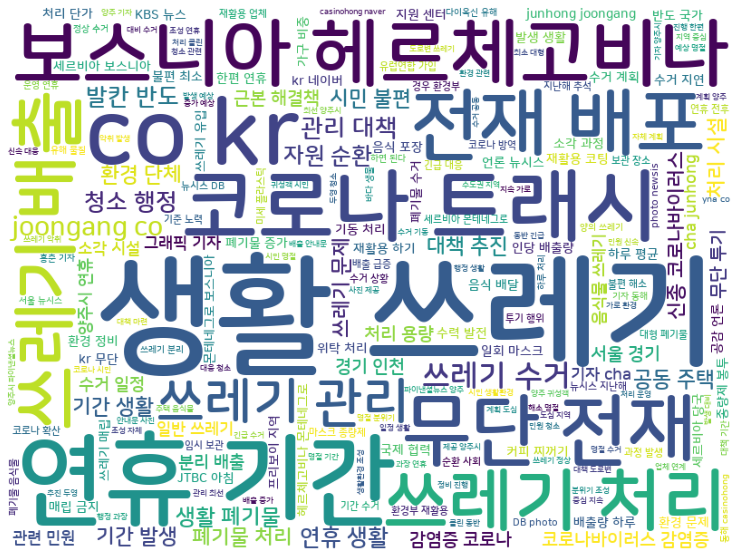

In [31]:
displayWordCloud(''.join(df_news['전처리']))